<a href="https://colab.research.google.com/github/Shantnu-Talokar/DeepLearningLab/blob/main/DL_Practical2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_regression

In [2]:
np.random.seed(0)
n_samples=30
true_function=lambda X:np.cos(1.5 * np.pi*X)
X=np.sort(np.random.rand(n_samples))
y=true_function(X)+np.random.rand(n_samples)*0.1

In [3]:
print("X Shape:",X.shape)
print("y Shape:",y.shape)

X Shape: (30,)
y Shape: (30,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(24,) (6,) (24,) (6,)


In [5]:
degreeUnder = 1
degreeBalanced = 4
degreeOver = 15

In [6]:
degrees = [degreeUnder, degreeBalanced, degreeOver]
models = {}
train_errors = {}
test_errors = {}

for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression())

    model.fit(X_train.reshape(-1, 1), y_train)
    models[degree] = model

    y_train_pred = model.predict(X_train.reshape(-1, 1))
    y_test_pred = model.predict(X_test.reshape(-1, 1))

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_errors[degree] = train_mse
    test_errors[degree] = test_mse

    print(f"Degree {degree}: Train MSE = {train_mse:.4f}, Test MSE = {test_mse:.4f}")

Degree 1: Train MSE = 0.2162, Test MSE = 0.2201
Degree 4: Train MSE = 0.0008, Test MSE = 0.0013
Degree 15: Train MSE = 0.0002, Test MSE = 0.0013


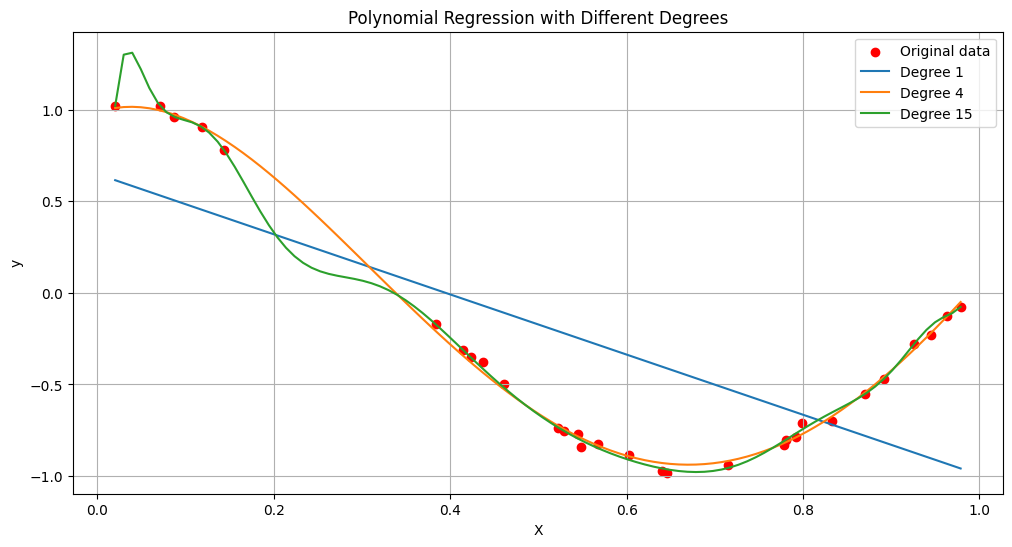

In [7]:
plt.figure(figsize=(12, 6))

plt.scatter(X, y, color='red', label="Original data")

X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
for degree, model in models.items():
    y_plot = model.predict(X_plot)
    plt.plot(X_plot, y_plot, label=f"Degree {degree}")

plt.xlabel("X")
plt.ylabel("y")
plt.title("Polynomial Regression with Different Degrees")
plt.legend()
plt.grid(True)
plt.show()